In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sasmodels.core import load_model
from sasmodels.direct_model import call_kernel

In [3]:
# create data to replicate results from pedersen paper
def get_contrasts(d):
    rho_solv = 1

    if d==1:
        # Homogenous
        rho_s = rho_solv+1
        rho_c = rho_solv+1
    if d==2:
        # Shell
        rho_s = rho_solv
        rho_c = rho_solv+1
    if d==3:
        # core
        rho_s = rho_solv+1
        rho_c = rho_solv

    return rho_solv, rho_s, rho_c 

# Example (units in Å)
Vc = 4000
Vs = 4000
R = 40
L = 100
N = 67
Rg = 10
d = 1.0
rho_solv, rho_s, rho_c = get_contrasts(2)
V_total = N*(Vs+Vc) 

# Spherical micelle in sasmodels

[homogenous] :  1 2 2
[shell] :  1 1 2
[core] :  1 2 1


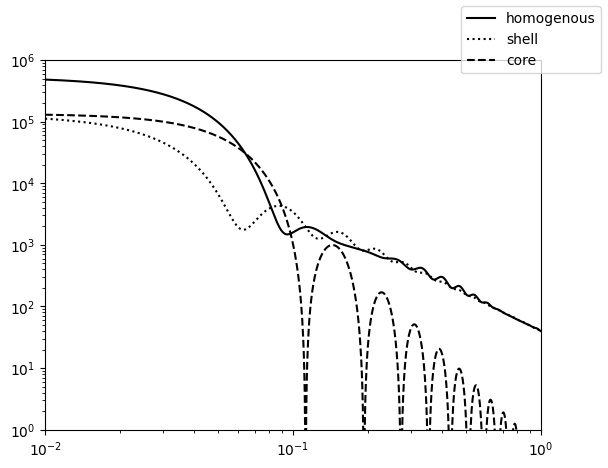

CPU times: user 717 ms, sys: 106 ms, total: 823 ms
Wall time: 301 ms


In [5]:
%%time
model = load_model("./models/spherical_micelle.py")
q = np.logspace(-2, 0, 1000)
kernel = model.make_kernel([q])

fig, ax = plt.subplots()
labels =['homogenous', 'shell', 'core']
linestyles = ['solid','dotted','dashed' ]
for i in range(3):
    rho_solv, rho_s, rho_c = get_contrasts(i+1)
    print('[%s] : '%labels[i], rho_solv, rho_s, rho_c)
    sphere_params = {'v_core' : Vc,    
            'v_corona' : Vs,
            'v_total' : V_total,
            'sld_solvent' : rho_solv,
            'sld_core' : rho_s,
            'sld_corona' : rho_c,
            'radius_core': R,
            'rg': Rg,
            'd_penetration':d,
            'n_aggreg' : N,
            }
    Iq = call_kernel(kernel, sphere_params)
    ax.loglog(q, Iq, label=labels[i], ls=linestyles[i], color='k')
    ax.set_ylim([1e0, 1e6])
    ax.set_xlim([1e-2, 1e0])
fig.legend()
plt.show()

# Cylindrical micelle in sasmodels

[homogenous] :  1 2 2
[shell] :  1 1 2
[core] :  1 2 1


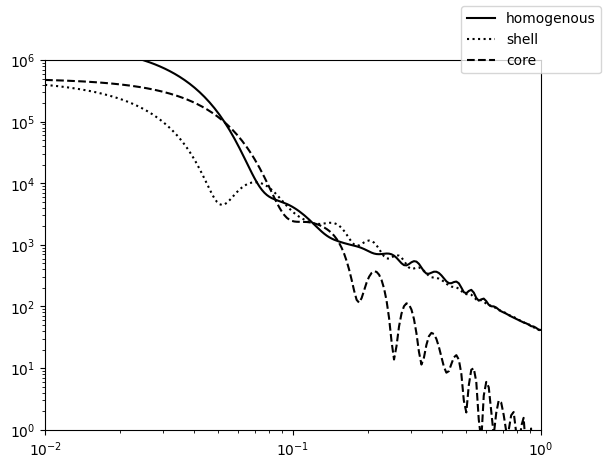

CPU times: user 702 ms, sys: 106 ms, total: 808 ms
Wall time: 299 ms


In [4]:
%%time
model = load_model("./models/cylindrical_micelle.py")
q = np.logspace(-2, 0, 200)
kernel = model.make_kernel([q])

fig, ax = plt.subplots()
labels =['homogenous', 'shell', 'core']
linestyles = ['solid','dotted','dashed' ]
for i in range(3):
    rho_solv, rho_s, rho_c = get_contrasts(i+1)
    print('[%s] : '%labels[i], rho_solv, rho_s, rho_c)
    cyl_params = {'v_core' : Vc,    
            'v_corona' : Vs,
            'v_total' : V_total,
            'sld_solvent' : rho_solv,
            'sld_core' : rho_s,
            'sld_corona' : rho_c,
            'radius_core': R,
            'rg': Rg,
            'length_core': L,
            'd_penetration':d,
            'n_aggreg' : N,
            }
    Iq = call_kernel(kernel, cyl_params)
    ax.loglog(q, Iq, label=labels[i], ls=linestyles[i], color='k')
    ax.set_ylim([1e0, 1e6])
    ax.set_xlim([1e-2, 1e0])
fig.legend()
plt.show()

# Ellipsoidal micelle in sasmodels

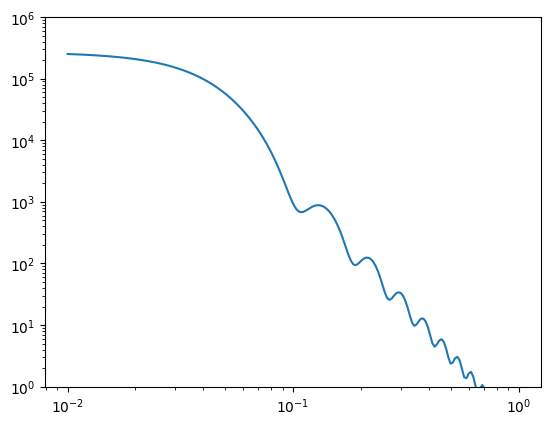

In [5]:
model = load_model("./models/ellipsoidal_micelle.py")
q = np.logspace(-2, 0, 200)
kernel = model.make_kernel([q])
ellipsoid_params = {'v_core' : 4000.0,
         'v_corona' : 4000.0,
         'sld_solvent' : 1.0,
         'sld_core' : 2.0,
         'sld_corona' : 1.0,
         'radius_core': 40,
         'rg': 10,
         'eps': 2.0,
         'd_penetration':1.0,
         'n_aggreg' : 67.0
         }
Iq = call_kernel(kernel, ellipsoid_params)
fig, ax = plt.subplots()
ax.loglog(q, Iq)
ax.set_ylim([1e0, 1e6])
plt.show()